<a href="https://colab.research.google.com/github/retolador/machine_learning_retolador/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Reference and link in kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

Index
1. Prepare data
2. Using a model with an amount of data (30000)
3. Create a new model with all data
4. Compare results

In [1]:
#Libraries
%tensorflow_version 2.x

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

##Prepare data

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: creditcard.csv          


In [4]:
data = pd.read_csv("creditcard.csv")
print(data.shape)

(284807, 31)


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The column Time doesn't matter and I will be eliminate

In [5]:
data = data.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [6]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227845, 29)

#Auto encoder 
This is a standard dense autoencoder with four layers getted from https://github.com/msiddalingaiah/MachineLearning/blob/master/Anomalies/Credit_Card_Fraud.ipynb

In [ ]:
#The standard model 
input_dim = X_train.shape[1]
encoding_dim = 14

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
model.add(Dense(input_dim, activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 14)                420       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_16 (Dense)             (None, 29)                232       
Total params: 813
Trainable params: 813
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nb_epoch = 40 # this hyperparameters are the same than the original model
batch_size = 32

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1)

autoencoder = model

Epoch 1/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.8997 - acc: 0.5224 - val_loss: 0.8021 - val_acc: 0.6802
Epoch 2/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7848 - acc: 0.6858 - val_loss: 0.7822 - val_acc: 0.7056
Epoch 3/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7548 - acc: 0.7063 - val_loss: 0.7733 - val_acc: 0.7022
Epoch 4/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7511 - acc: 0.7059 - val_loss: 0.7676 - val_acc: 0.7107
Epoch 5/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7500 - acc: 0.7036 - val_loss: 0.7659 - val_acc: 0.7107
Epoch 6/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7488 - acc: 0.7094 - val_loss: 0.7632 - val_acc: 0.7156
Epoch 7/40
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7389 - acc: 0.7114 - val_loss: 0.7611 - val_acc: 0.7101
Epoch 8/40
7121/7121 [==============================] -

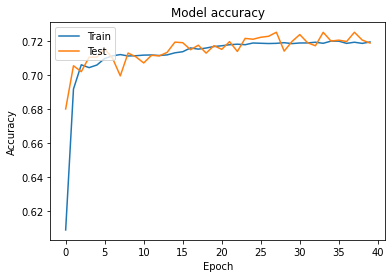

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Results 
This model with 30000 sample has get 70% of accuracy but now with all of the data that gets the 60 % of accuracy.

Now I will make a new model to improve the results.

## 2n model

In [7]:
input_dim = X_train.shape[1]
encoding_dim = 18 # Upgrade the encoding dimension
dropout = 0.2

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
model.add(Dropout(dropout)) # I put a dropout layer
model.add(Dense(input_dim, activation='relu'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 29)                290       
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [8]:
nb_epoch = 45 #Upgraded to 45
batch_size = 32

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1)

autoencoder = model

Epoch 1/45
7121/7121 [==============================] - 20s 2ms/step - loss: 0.9059 - acc: 0.4769 - val_loss: 0.8140 - val_acc: 0.6732
Epoch 2/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.8244 - acc: 0.5941 - val_loss: 0.7836 - val_acc: 0.7114
Epoch 3/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.8101 - acc: 0.6036 - val_loss: 0.7775 - val_acc: 0.7076
Epoch 4/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7997 - acc: 0.6077 - val_loss: 0.7716 - val_acc: 0.7163
Epoch 5/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.8006 - acc: 0.6142 - val_loss: 0.7692 - val_acc: 0.7227
Epoch 6/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.8002 - acc: 0.6164 - val_loss: 0.7679 - val_acc: 0.7234
Epoch 7/45
7121/7121 [==============================] - 17s 2ms/step - loss: 0.7861 - acc: 0.6155 - val_loss: 0.7665 - val_acc: 0.7339
Epoch 8/45
7121/7121 [==============================] -

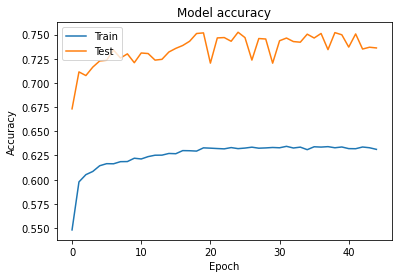

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Results
The bias are worst but the test prediction have been upgraded

Let's try another method:

## 3rd model:


In [10]:
input_dim = X_train.shape[1]
encoding_dim = 20 # Upgrade the encoding dimension
dropout = 0.25   #Change the dropout value

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 4), activation="tanh"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
#model.add(Dropout(dropout)) # I eliminate the dropout layer
model.add(Dense(input_dim, activation='relu'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 29)                319       
Total params: 1,244
Trainable params: 1,244
Non-trainable params: 0
_________________________________________________________________


In [11]:
nb_epoch = 45   #the number of epochs augemnted to 45
batch_size = 36 #the size augmented to 36

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1)

autoencoder = model

Epoch 1/45
6330/6330 [==============================] - 15s 2ms/step - loss: 0.9240 - acc: 0.5129 - val_loss: 0.8271 - val_acc: 0.6518
Epoch 2/45
6330/6330 [==============================] - 15s 2ms/step - loss: 0.7943 - acc: 0.6577 - val_loss: 0.8135 - val_acc: 0.6673
Epoch 3/45
6330/6330 [==============================] - 15s 2ms/step - loss: 0.7921 - acc: 0.6681 - val_loss: 0.8062 - val_acc: 0.6751
Epoch 4/45
6330/6330 [==============================] - 15s 2ms/step - loss: 0.7925 - acc: 0.6733 - val_loss: 0.8002 - val_acc: 0.6760
Epoch 5/45
6330/6330 [==============================] - 15s 2ms/step - loss: 0.7909 - acc: 0.6765 - val_loss: 0.7964 - val_acc: 0.6728
Epoch 6/45
6330/6330 [==============================] - 17s 3ms/step - loss: 0.7804 - acc: 0.6767 - val_loss: 0.7926 - val_acc: 0.6758
Epoch 7/45
6330/6330 [==============================] - 17s 3ms/step - loss: 0.7749 - acc: 0.6763 - val_loss: 0.7903 - val_acc: 0.6807
Epoch 8/45
6330/6330 [==============================] -

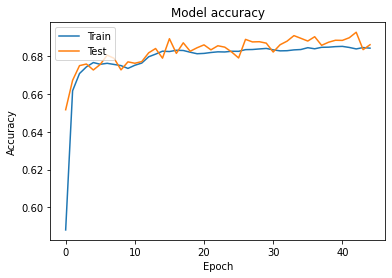

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 4th Model



In [13]:
#The standard model changing the hyperparameters 
input_dim = X_train.shape[1]
encoding_dim = 18

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
model.add(Dense(input_dim, activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 18)                540       
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 171       
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_12 (Dense)             (None, 29)                290       
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [14]:
nb_epoch = 45
batch_size = 34

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1)

autoencoder = model

Epoch 1/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.8730 - acc: 0.5051 - val_loss: 0.7954 - val_acc: 0.6815
Epoch 2/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7667 - acc: 0.6957 - val_loss: 0.7673 - val_acc: 0.7184
Epoch 3/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7332 - acc: 0.7242 - val_loss: 0.7584 - val_acc: 0.7369
Epoch 4/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7362 - acc: 0.7419 - val_loss: 0.7530 - val_acc: 0.7518
Epoch 5/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7442 - acc: 0.7502 - val_loss: 0.7497 - val_acc: 0.7538
Epoch 6/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7162 - acc: 0.7571 - val_loss: 0.7476 - val_acc: 0.7622
Epoch 7/45
6702/6702 [==============================] - 16s 2ms/step - loss: 0.7296 - acc: 0.7597 - val_loss: 0.7461 - val_acc: 0.7677
Epoch 8/45
6702/6702 [==============================] -

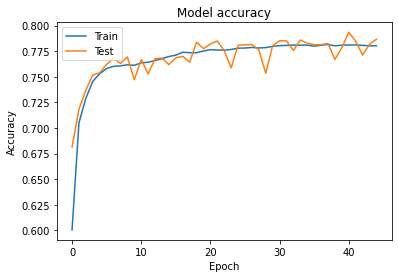

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Final Results
Finally the best result was the 4th model
With 78% of accuracy in train and test.

# Analysis
Finally with the 4th model, we will see the analysis of the model

In [17]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

In [18]:
normal = error_df[error_df.true_class == 0]
fraud = error_df[error_df.true_class == 1]

print('Normal transactions: %d, fraud transactions: %d' % (len(normal), len(fraud)))

Normal transactions: 56861, fraud transactions: 101


## Confusion Matrix
Finally we will see the confusion matrix with the true and false positives and negatives.

In [22]:
true_positives = len(fraud[fraud.reconstruction_error >= threshold])
false_positives = len(normal[normal.reconstruction_error >= threshold])

true_negatives = len(normal[normal.reconstruction_error < threshold])
false_negatives = len(fraud[fraud.reconstruction_error < threshold])

print('True positives: %d, true negatives: %d' % (true_positives, true_negatives))
print('False positives: %d, false negatives: %d' % (false_positives, false_negatives))

True positives: 62, true negatives: 56293
False positives: 568, false negatives: 39


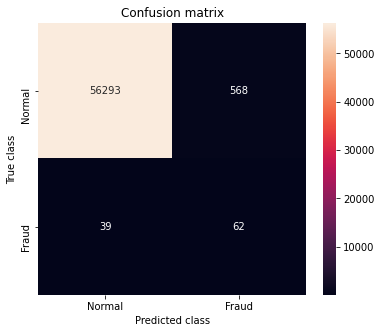

In [24]:
labels = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()